In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt

import scipy
from scipy.spatial import HalfspaceIntersection
from scipy.spatial import ConvexHull

from scipy.stats import truncnorm

import arviz

from DikinSamplers import RandomWalk, Langevin, DikinLangevin

In [35]:
torch.manual_seed(0)
torch.randn(10)
torch.randn(10)

tensor([-0.5966,  0.1820, -0.8567,  1.1006, -1.0712,  0.1227, -0.5663,  0.3731,
        -0.8920, -1.5091])

In [34]:
torch.manual_seed(1)
torch.randn(10)

tensor([ 0.6614,  0.2669,  0.0617,  0.6213, -0.4519, -0.1661, -1.5228,  0.3817,
        -1.0276, -0.5631])

In [38]:
NUM_TRIALS = 200
NUM_SAMPLES = 50_000

In [6]:
dikinlangevin_results = [np.load(f"metropolis_results/dikinlangevin_trial_{i}.npy")[:, :, None] 
                         for i in range(NUM_TRIALS)]
dikinlangevin_results = np.concatenate(dikinlangevin_results, axis=-1)
dikinlangevin_results = dikinlangevin_results.transpose(2, 0, 1)

In [25]:
out = (np.linalg.norm(dikinlangevin_results, axis=-1) ** 2).T.cumsum(axis=0)
out = out / np.arange(1, len(out) + 1)[:, None]
np.savetxt("dikinlanvegin_cummean_norm.csv", out, delimiter=",")

In [62]:
dikinlangevin_rhat_vals = [arviz.rhat(dikinlangevin_results[:, -NUM_SAMPLES:, i]) for i in range(10)]

In [45]:
ess_vals = [arviz.ess(dikinlangevin_results[:, -NUM_SAMPLES:, i]) for i in range(10)]
min(ess_vals), max(ess_vals)

(np.float64(14375.464967078622), np.float64(2426854.7818426476))

In [41]:
randomwalk_results = [np.load(f"metropolis_results/randomwalk_trial_{i}.npy")[:, :, None] 
                      for i in range(NUM_TRIALS)]
randomwalk_results = np.concatenate(randomwalk_results, axis=-1)
randomwalk_results = randomwalk_results.transpose(2, 0, 1)

In [21]:
out = (np.linalg.norm(randomwalk_results, axis=-1) ** 2).T.cumsum(axis=0)
out = out / np.arange(1, len(out) + 1)[:, None]
np.savetxt("randomwalk_cummean_norm.csv", out, delimiter=",")

In [698]:
out.shape

(100000, 200)

In [63]:
randomwalk_rhat_vals = [arviz.rhat(randomwalk_results[:, -NUM_SAMPLES:, i]) for i in range(10)]

In [46]:
ess_vals = [arviz.ess(randomwalk_results[:, -NUM_SAMPLES:, i]) for i in range(10)]
min(ess_vals), max(ess_vals)

(np.float64(3357.839134189303), np.float64(491638.79654931155))

In [18]:
langevin_results = [np.load(f"metropolis_results/langevin_trial_{i}.npy")[:, :, None] 
                      for i in range(NUM_TRIALS)]
langevin_results = np.concatenate(langevin_results, axis=-1)
langevin_results = langevin_results.transpose(2, 0, 1)

In [20]:
out = (np.linalg.norm(langevin_results, axis=-1) ** 2).T.cumsum(axis=0)
out = out / np.arange(1, len(out) + 1)[:, None]
np.savetxt("langevin_cummean_norm.csv", out, delimiter=",")

In [64]:
langevin_rhat_vals = [arviz.rhat(langevin_results[:, -NUM_SAMPLES:, i]) for i in range(10)]

In [71]:
out = np.array(dikinlangevin_rhat_vals)
[np.quantile(out, [0.5, 0.9, 1]), np.mean(out > 1.01)]

[array([1.00203676, 1.00896266, 1.01312861]), np.float64(0.1)]

In [72]:
out = np.array(randomwalk_rhat_vals)
[np.quantile(out, [0.5, 0.9, 1]), np.mean(out > 1.01)]

[array([1.00637631, 1.0251682 , 1.04024002]), np.float64(0.4)]

In [73]:
out = np.array(langevin_rhat_vals)
[np.quantile(out, [0.5, 0.9, 1]), np.mean(out > 1.01)]

[array([1.05963624, 3.5726744 , 4.00723841]), np.float64(0.6)]

In [51]:
np.mean(rhat_vals)

np.float64(1.7428323363638025)

In [47]:
ess_vals = [arviz.ess(langevin_results[:, -NUM_SAMPLES:, i]) for i in range(10)]
min(ess_vals), max(ess_vals)

(np.float64(213.9045453632898), np.float64(7336185.315303067))

In [572]:
# num_iters = 1_000

# log_pdf = lambda x: -0.5 * torch.linalg.norm(x, axis=-1) ** 2

# sampler = DikinLangevin(1e-8, torch.tensor(A, dtype=torch.float64), log_pdf, e=0)
# history3, accept_ratio3 = sampler.run(num_iters)

In [573]:
# expected = np.linalg.norm(np.random.normal(0, 1, size=(50_000, d)), axis=-1).mean()
# expected

In [574]:
# np.linalg.norm(history3, axis=-1).mean()

In [575]:
# out = np.linalg.norm(history3, axis=-1).cumsum()
# plt.plot(out / np.arange(1, len(out) + 1));
# plt.plot([0, len(out)], [expected, expected]);

In [674]:
d = 10
A = np.concatenate([np.eye(d), -np.eye(d)], axis=0)
v = 10 ** np.linspace(-2, 0, d)[::-1]
v = np.concatenate([v, v])
A /= v[:, None]

v_tensor = torch.tensor(v[:d], dtype=torch.float64)
x0 = (torch.zeros(d, dtype=torch.float64) + 0.5) * v_tensor

v_scale = 0.5 * v_tensor ** 1.5

In [75]:
d = 10
A = np.concatenate([np.eye(d), -np.eye(d)], axis=0)

In [112]:
num_iters = 100_000

c = 1
x0 = torch.zeros(d, dtype=torch.float64) + 0.5;
x1 = torch.zeros(d, dtype=torch.float64) - 0.5;
v_tensor = torch.ones_like(x0)
log_pdf = lambda x: torch.logaddexp(-1 * torch.linalg.norm((x - x0) / (v_tensor), axis=-1) ** 2,
                                    -1 * torch.linalg.norm((x - x1) / (v_tensor), axis=-1) ** 2)

# log_pdf = lambda x: -0.5 * torch.linalg.norm((x - x0) / v_scale, axis=-1) ** 2

sampler = DikinLangevin(0.05, torch.tensor(A, dtype=torch.float64), log_pdf, beta=1, e=1e-5)
# sampler = Langevin(4e-7, torch.tensor(A, dtype=torch.float64), log_pdf, e=0)
sampler = RandomWalk(0.025, torch.tensor(A, dtype=torch.float64), log_pdf, e=1e-5)
history2, accept_ratio2 = sampler.run(num_iters)

 10%|████▌                                           | 9619/100000 [00:10<01:28, 1018.06it/s, Acc. Prob 0.629]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 14%|██████▌                                        | 14011/100000 [00:14<01:24, 1017.76it/s, Acc. Prob 0.632]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 18%|████████▋                                       | 17997/100000 [00:17<01:25, 963.83it/s, Acc. Prob 0.630]IOPub message rate e

 89%|█████████████████████████████████████████▉     | 89291/100000 [01:18<00:09, 1077.07it/s, Acc. Prob 0.625]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 93%|███████████████████████████████████████████▊   | 93246/100000 [01:21<00:06, 1080.06it/s, Acc. Prob 0.625]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 97%|█████████████████████████████████████████████▊ | 97400/100000 [01:25<00:02, 1088.44it/s, Acc. Prob 0.625]IOPub message rate e

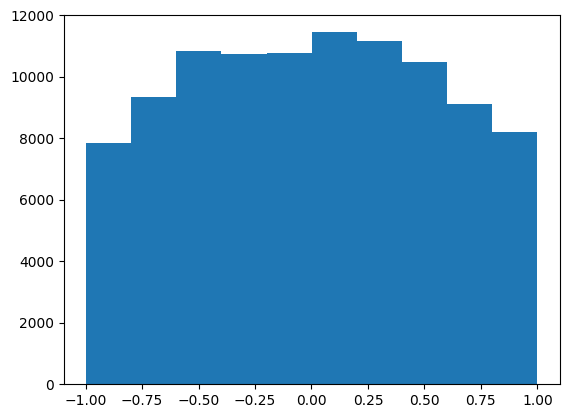

In [113]:
plt.hist(history3[:, 2]);

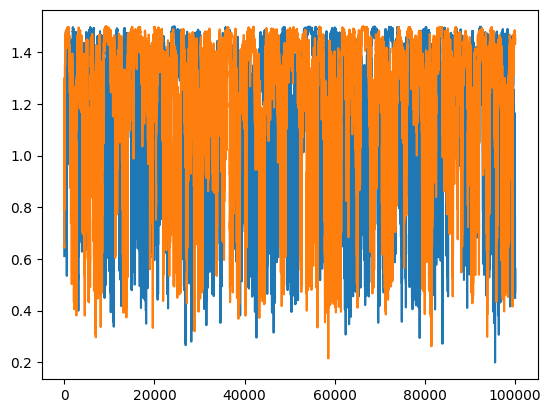

In [114]:
plt.plot(np.linalg.norm(history3 - 0.5, axis=-1, ord=np.inf))
plt.plot(np.linalg.norm(history3 + 0.5, axis=-1, ord=np.inf))

In [676]:
# v_scale = torch.linspace(1, 0.01, d, dtype=torch.float64)

In [677]:
# x0 = (torch.zeros(d, dtype=torch.float64) + 0.5) * v_tensor

In [678]:
samples = []
temp_expectation = []
d = 10
for i in range(d):
    loc, scale = x0[i].item(), v_scale[i].item()
    a, b = (-v[i] - loc) / scale, (v[i] - loc) / scale
    
    s1 = scipy.stats.truncnorm.rvs(a, b, loc=loc, scale=scale, size=10_000).reshape(-1, 1)
    
    
    temp_expectation.append(scipy.stats.truncnorm.expect(lambda x: x ** 2, 
                                                         args=(a, b), loc=loc, scale=scale))
    # loc, scale = x0[i], 1
    # a, b = (-v[i] - loc) / scale, (v[i] - loc) / scale
    # s2 = scipy.stats.truncnorm.rvs(a, b, loc=loc, scale=scale, size=50_000).reshape(-1, 1)
    
    # samples.append(np.concatenate([s1, s2], axis=0))
    samples.append(s1)
    
samples = np.concatenate(samples, axis=1)
expected_val = np.sum(temp_expectation)
expected_val

np.float64(0.4446709099274374)

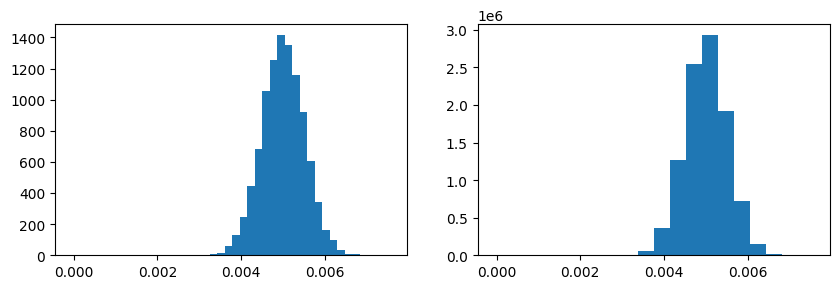

In [679]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharex=True)

i = 9
axs[0].hist(samples[:, i], bins=20);
axs[1].hist(dikinlangevin_results[:, :, i].flatten(), bins=20);
# axs[1].hist(randomwalk_results[:, :, i].flatten(), bins=20);
# axs[1].hist(history3[1000:, i].flatten(), bins=20);

In [680]:
# out = np.linalg.norm(history3, axis=-1).T
# out.mean()

In [681]:
out = (np.linalg.norm(dikinlangevin_results, axis=-1) ** 2).T
out.mean()

np.float32(0.44557044)

In [682]:
out = (np.linalg.norm(randomwalk_results, axis=-1) ** 2).T
out.mean()

np.float32(0.44768694)

In [683]:
out.shape

(50000, 200)

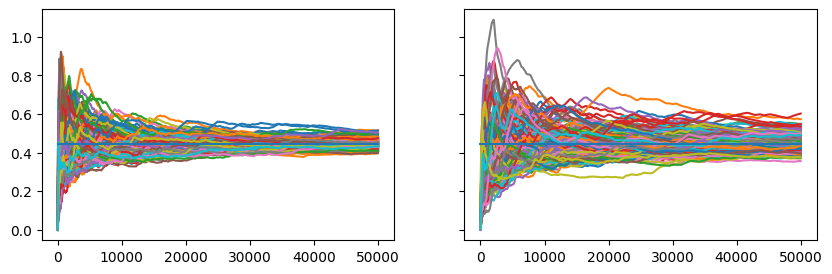

In [685]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

# out = np.linalg.norm(dikinlangevin_results, axis=-1).T.cumsum(axis=0).mean(axis=-1)[:, None]
out = (np.linalg.norm(dikinlangevin_results, axis=-1) ** 2).T.cumsum(axis=0)
axs[0].plot(out / np.arange(1, len(out) + 1)[:, None])
axs[0].plot([1, len(out) + 1], [expected_val, expected_val])

# out = np.linalg.norm(randomwalk_results, axis=-1).T.cumsum(axis=0).mean(axis=-1)[:, None]
out = (np.linalg.norm(randomwalk_results, axis=-1) ** 2).T.cumsum(axis=0)
axs[1].plot(out / np.arange(1, len(out) + 1)[:, None])
axs[1].plot([1, len(out) + 1], [expected_val, expected_val])

In [543]:
def _pairwise_norm(X, Y=None):
    Y = X if Y is None else Y
    D2 = np.sum((X[:, None, :] - Y[None, :, :]) ** 2, axis=-1)
    return np.sqrt(np.maximum(D2, 0.0))

def energy_distance(X, Y):
    # ED^2 = 2 E||X-Y|| - E||X-X'|| - E||Y-Y'||
    # Dxy = _pairwise_norm(X, Y).mean()
    # Dxx = _pairwise_norm(X).mean()
    # Dyy = _pairwise_norm(Y).mean()
    
    Dxy = mean_pairwise_norm(X, Y)
    Dxx = mean_pairwise_norm(X)
    Dyy = 0.566903089989029
    return np.sqrt(np.maximum(2*Dxy - Dxx - Dyy, 0.0))

In [544]:
def mean_pairwise_norm(X, Y=None, chunk=2048):
    X = np.asarray(X, dtype=float)
    X2 = np.sum(X*X, axis=1)
    if Y is None:
        Y = X
        Y2 = X2
    else:
        Y = np.asarray(Y, dtype=float)
        Y2 = np.sum(Y*Y, axis=1)
    
    n = X.shape[0]; m = Y.shape[0]

    total = 0.0
    count = 0
    for i0 in range(0, n, chunk):
        i1 = min(i0 + chunk, n)
        Xi = X[i0:i1]
        Xi2 = X2[i0:i1][:, None]
        for j0 in range(0, m, chunk):
            j1 = min(j0 + chunk, m)
            Yj = Y[j0:j1]
            Yj2 = Y2[j0:j1][None, :]
            D2 = Xi2 + Yj2 - 2.0 * (Xi @ Yj.T)
            np.maximum(D2, 0.0, out=D2)
            total += np.sum(np.sqrt(D2, out=D2))
            count += (i1 - i0) * (j1 - j0)
    return total / count

In [589]:
mean_pairwise_norm(samples)

np.float64(0.5672329076970861)

In [590]:
energy_distance(randomwalk_results[:, -1, :], samples)

np.float64(0.09908548880694759)

In [591]:
energy_distance(dikinlangevin_results[:, -1, :], samples)

np.float64(0.09219784163146552)

In [592]:
randomwalk_results.shape, dikinlangevin_results.shape

((50, 50000, 10), (50, 50000, 10))

In [593]:
N = dikinlangevin_results.shape[1]
N = 2000

In [594]:
randomwalk_ed = [energy_distance(randomwalk_results[:, i, :], samples) for i in range(N)]

In [595]:
langevin_ed = [energy_distance(dikinlangevin_results[:, i, :], samples) for i in range(N)]

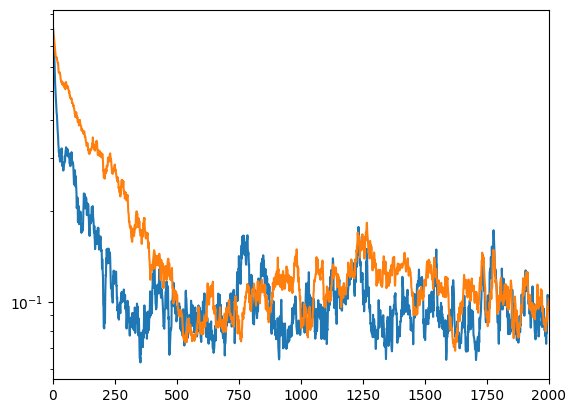

In [596]:
plt.plot(langevin_ed)
plt.plot(randomwalk_ed)
# plt.plot([0, len(randomwalk_ed)], [0.05, 0.05])
plt.xlim(0, N)
plt.yscale('log');

In [90]:
import sklearn

In [96]:
kmeans = sklearn.cluster.KMeans(n_clusters=2).fit(history3)
kmeans.cluster_centers_

e1 = np.linalg.norm(kmeans.cluster_centers_ - x0.numpy()[None, :], axis=-1).min()
e2 = np.linalg.norm(kmeans.cluster_centers_ - x1.numpy()[None, :], axis=-1).min()

e1, e2

(np.float64(1.075035052774445), np.float64(0.6168961802430711))

In [97]:
kmeans.cluster_centers_

array([[ 0.08880332,  0.19188495,  0.06138857,  0.1573992 ,  0.16286169,
         0.25212473,  0.2954943 ,  0.12675892,  0.15105164,  0.17762345],
       [-0.2967162 , -0.23503526, -0.21410495, -0.3040358 , -0.5220514 ,
        -0.2786469 , -0.42694634, -0.25714594, -0.41637546, -0.33236682]],
      dtype=float32)

In [ ]:
kmeans = sklearn.cluster.KMeans(n_clusters=2).fit(history2)

e1 = np.linalg.norm(kmeans.cluster_centers_ - x0.numpy()[None, :], axis=-1).min()
e2 = np.linalg.norm(kmeans.cluster_centers_ - x1.numpy()[None, :], axis=-1).min()

e1, e2

In [ ]:
kmeans = sklearn.cluster.KMeans(n_clusters=2).fit(history1)
kmeans.cluster_centers_

e1 = np.linalg.norm(kmeans.cluster_centers_ - x0.numpy()[None, :], axis=-1).min()
e2 = np.linalg.norm(kmeans.cluster_centers_ - x1.numpy()[None, :], axis=-1).min()

e1, e2